# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

**Introduction**
Throughout the course of this project I will be analysing data regarding the comparative revenues of two different phone plans offered by the Megaline telecom company. I will be combining 5 csv files of assorted data, utilizing data preprocessing to fix or remove any irregularities in the data, then using EDA and SDA to assess the data and check my hypotheses. 

**Hypotheses**

1. The 'Ultimate' phone plan draws in more overall revenue due to it being a better deal and thus likely more popular 
2. The 'Surf' phone plan tends to cost users more than expected as it is easy to go past the plan's set limits meaning individuals end up spending more than they originally planned. 

## Initialization

First step is to add the various libraries I will need.

In [ ]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st


## Load data

Now lets bring in the assorted CSV files.

In [ ]:
# Load the data files into different DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
message = pd.read_csv('/datasets/megaline_messages.csv') 
plans = pd.read_csv('/datasets/megaline_plans.csv') 
users = pd.read_csv('/datasets/megaline_users.csv') 


## Prepare the data

Before I can get to the analysis I need to conduct some data preprocessing on the collection of CSV files I've been supplied with. I'll be checking for correct datatypes, null values, and duplicated rows.

I've broken the preprocessing steps for each dataframe into its own section for clarity.

## Plans

In [ ]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
plans.describe

<bound method NDFrame.describe of    messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  >

In [ ]:
# Print a sample of data for plans

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The `plans` dataframe is very straight forward and has no incorrect datatype or data irregularities. 

## 1.5 Fix Data

N/A

## Enrich data

N/A

## Users

In [ ]:
# Print the general/summary information about the users' DataFrame

users.info()
users.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<bound method NDFrame.describe of      user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                                Tulsa, OK MSA  2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf   
..   

In [ ]:
# Print a sample of data for users

users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


The `users` dataframe has a two issues that need to be resolved; `reg_date` needs to be converted to datetime and `churn_date` (the date the user's plan ended) has 466 null values. Given that only 34 rows in the `churn_date` column are not null I will remove the column entirely. 

I will also add a `region` column which will be useful for the final hypothesis test at the end of this project.

### Fix Data

In [ ]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [ ]:
users = users.fillna('ongoing')

In [ ]:
users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Raleigh-Cary, NC MSA                                1
Greensboro-High Point, NC MSA                       1
Stockton, CA MSA                                    1
Jacksonville, FL MSA                                1
Albany-Schenectady-Troy, NY MSA                     1
Name: city, Length: 73, dtype: int64

In [ ]:
def region(area):
    if area == 'New York-Newark-Jersey City, NY-NJ-PA MSA':
        return 'NY-NJ area'
    else:
        return 'Other'

In [ ]:
users['region'] = users['city'].apply(region)

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,ongoing,Other
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,Other
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,ongoing,Other
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,ongoing,Other
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,ongoing,Other


### Enrich Data

I will also add a column with a numerical scale for `plan` to make later analysis easier.

In [ ]:
def plan_types(plan):
    if plan == 'surf':
        return 0
    if plan == 'ultimate':
        return 1

In [ ]:
users['plan_types'] = users['plan'].apply(plan_types)

## Calls

In [ ]:
# Print the general/summary information about the calls' DataFrame
calls.info()
calls.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


<bound method NDFrame.describe of               id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]>

In [ ]:
# Print a sample of data for calls

calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


`id` needs to be converted to integer and `call_date` needs to be converted to datetime. There are no null values. I will add a column with the total call time for each user in `user_id` and then drop the drop the duplicates. 

### Fix data

In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') 
calls['id'] = calls['id'].astype(int)

### Enrich data

Below I will create a `month` column to ease later analysis.

In [ ]:
calls['month'] = calls['call_date'].dt.month

In [ ]:
calls['duration'] = calls['duration'].apply(np.ceil)

## Messages

In [ ]:
# Print the general/summary information about the messages' DataFrame
message.info()
message.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


<bound method NDFrame.describe of              id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]>

In [ ]:
# Print a sample of data for messages

message.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


`id` needs to be changed to integer and `message_date` needs to be changed to datetime. There are no null values.

### Fix data

In [ ]:
message['message_date'] = pd.to_datetime(message['message_date'], format='%Y-%m-%d') 
message['id'] = message['id'].astype(int)

### Enrich data

Below I will create a `month` column to ease later analysis.

In [ ]:
message['month'] = message['message_date'].dt.month

## Internet

In [ ]:
# Print the general/summary information about the internet DataFrame
internet.info()
internet.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


<bound method NDFrame.describe of               id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]>

In [ ]:
# Print a sample of data for the internet traffic
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [ ]:
internet['mb_used'].value_counts()

0.00      13747
414.46        8
435.77        8
423.06        7
313.79        7
          ...  
301.21        1
108.62        1
608.63        1
212.02        1
677.66        1
Name: mb_used, Length: 57624, dtype: int64

In [ ]:
print((13747/len(internet))*100)

13.11423801574052


`id` needs to be changed to integer and `session_date` needs to be changed to datetime. There are no null values.

There are 13747 rows in `mb_used` that are '0.00'. Given that ese '0.00' values make up ~13% of the `mb_used` column this is not an overwhelming number but is also not an outlier and thus these unsual rows cannot be deleted without due thought. The most likely explanation for these rows is that users used data for a brief moment, perhaps opening a search browser or before their wifi kicked in. Given the nature of our analysis it would be unwise to replace the rows with '0.00' with a different value. To avoid these rows impacting the overall anlysis I will create a new dataframe without the '0.00' rows.

In [ ]:
internet_adjusted = internet[internet['mb_used'] != 0.00].copy()

In [ ]:
internet_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            91078 non-null  object 
 1   user_id       91078 non-null  int64  
 2   session_date  91078 non-null  object 
 3   mb_used       91078 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ MB


In [ ]:
internet_adjusted['mb_used'].value_counts()

435.77    8
414.46    8
358.90    7
131.28    7
417.46    7
         ..
301.21    1
108.62    1
608.63    1
212.02    1
677.66    1
Name: mb_used, Length: 57623, dtype: int64

### Fix data

In [ ]:
internet_adjusted['session_date'] = pd.to_datetime(internet_adjusted['session_date'], format='%Y-%m-%d') 

In [ ]:
internet_adjusted['id'] = internet_adjusted['id'].astype(int)

### Enrich data

Below I will create a `month` column to ease later analysis.

In [ ]:
internet_adjusted['month'] = internet_adjusted['session_date'].dt.month

In [ ]:
internet_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  int64         
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
 4   month         91078 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 4.2 MB


## Study plan conditions

In [ ]:
# Print out the plan conditions and make sure they are clear for you

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user
Now that my data preprocessing is completed I can begin to manipulate the data in the best format for analysis. To do this I will be creating pivot tables for each dataframe with the most relevent data. 

In [ ]:
# Calculate the number of calls made by each user per month. Save the result.

calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc= ['count', 'sum']).reset_index()

calls_pivot.head(5)

,user_id,month,count,sum
,,,duration,duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


In [ ]:
calls_pivot.columns = ['user_id', 'month', 'calls', 'duration']

In [ ]:
calls_pivot.head()

,user_id,month,calls,duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


In [ ]:
# Calculate the number of messages sent by each user per month. Save the result.

message_pivot = message.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()

message_pivot.head(5)

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [ ]:
message_pivot['texts'] = message_pivot['id']
message_pivot = message_pivot.drop('id', 1)
message_pivot.head(5)

,user_id,month,texts
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [ ]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

internet_pivot = internet_adjusted.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()

internet_pivot.head(5)

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [ ]:
internet_pivot['gb_used'] = internet_pivot['mb_used']/1024

In [ ]:
internet_pivot['gb_used'] = internet_pivot['gb_used'].apply(np.ceil)

In [ ]:
internet_pivot.head()

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


Now that I have a created a collection of aggregate pivot tables and added a rounded `gb_used` column I need to merge them in to one dataframe so I can conduct my analysis. 

In [ ]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

#agg_plan_data1 = pd.merge(calls_total_pivot, calls_duration_pivot, 'left', on = ['user_id', 'month'])
agg_plan_data1 = pd.merge(message_pivot, internet_pivot, 'outer', on = ['user_id', 'month'])
agg_plan_data = pd.merge(agg_plan_data1, calls_pivot, 'left', on = ['user_id', 'month'])

In [ ]:
agg_plan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2292 non-null   int64  
 1   month     2292 non-null   int64  
 2   texts     1806 non-null   float64
 3   mb_used   2277 non-null   float64
 4   gb_used   2277 non-null   float64
 5   calls     2257 non-null   float64
 6   duration  2257 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 143.2 KB


In [ ]:
plan_data_final = pd.merge(agg_plan_data, users, 'outer', on = ['user_id'])

In [ ]:
plan_data_final.head(10)

,user_id,month,texts,mb_used,gb_used,calls,duration,first_name,last_name,age,city,reg_date,plan,churn_date,region,plan_types
0,1000,12.0,11.0,1901.47,2.0,16.0,124.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,ongoing,Other,1
1,1001,8.0,30.0,6919.15,7.0,27.0,182.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,Other,0
2,1001,9.0,44.0,13314.82,14.0,49.0,315.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,Other,0
3,1001,10.0,53.0,22330.49,22.0,65.0,393.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,Other,0
4,1001,11.0,36.0,18504.30,19.0,64.0,426.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,Other,0
5,1001,12.0,44.0,19369.18,19.0,56.0,412.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,Other,0
6,1002,10.0,15.0,6552.01,7.0,11.0,59.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,ongoing,Other,0
7,1002,11.0,32.0,19345.08,19.0,55.0,386.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,ongoing,Other,0
8,1002,12.0,41.0,14396.24,15.0,47.0,384.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,ongoing,Other,0
9,1003,12.0,50.0,27044.14,27.0,149.0,1104.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,ongoing,Other,0


In [ ]:
plan_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2302 entries, 0 to 2301
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2302 non-null   int64         
 1   month       2292 non-null   float64       
 2   texts       1806 non-null   float64       
 3   mb_used     2277 non-null   float64       
 4   gb_used     2277 non-null   float64       
 5   calls       2257 non-null   float64       
 6   duration    2257 non-null   float64       
 7   first_name  2302 non-null   object        
 8   last_name   2302 non-null   object        
 9   age         2302 non-null   int64         
 10  city        2302 non-null   object        
 11  reg_date    2302 non-null   datetime64[ns]
 12  plan        2302 non-null   object        
 13  churn_date  2302 non-null   object        
 14  region      2302 non-null   object        
 15  plan_types  2302 non-null   int64         
dtypes: datetime64[ns](1), fl

Now that I have compiled my final dataframe I was hoping to be able to jump right in to the analysis. Instead however, I can see that there are null values in `texts` and `mb_used`. I can infer these null values are appearing because the users never texted or used data for those respective months. For this reason I will quickly fill the null values with '0' to indicate as such. 

I will also drop the 10 rows that have null values in `month`. 

In [ ]:
plan_data_final = plan_data_final.dropna(subset = ['month'])

In [ ]:
plan_data_final = plan_data_final.fillna(0)

In [ ]:
plan_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     2292 non-null   int64         
 1   month       2292 non-null   float64       
 2   texts       2292 non-null   float64       
 3   mb_used     2292 non-null   float64       
 4   gb_used     2292 non-null   float64       
 5   calls       2292 non-null   float64       
 6   duration    2292 non-null   float64       
 7   first_name  2292 non-null   object        
 8   last_name   2292 non-null   object        
 9   age         2292 non-null   int64         
 10  city        2292 non-null   object        
 11  reg_date    2292 non-null   datetime64[ns]
 12  plan        2292 non-null   object        
 13  churn_date  2292 non-null   object        
 14  region      2292 non-null   object        
 15  plan_types  2292 non-null   int64         
dtypes: datetime64[ns](1), fl

In [ ]:
plan_data_final['month'].value_counts()

12.0    469
11.0    410
10.0    343
9.0     280
8.0     232
7.0     180
6.0     144
5.0     106
4.0      71
3.0      35
2.0      16
1.0       6
Name: month, dtype: int64

It worked! Now I can move into the actual analysis.

The first step in this analysis journey is to create a column with the profit/month for each user. To do this I will create a function that iterates over each row and either returns the plan fee if the user did not surpass it or the total fee the user paid including any additional expenses incurred.

In [ ]:
# Calculate the monthly revenue for each user

def profit(row):
    fee = 0
    if row['plan'] == 'ultimate': 
        fee = 70
        if row['duration'] > 3000:
            fee += (row['duration'] - 3000) * 0.01
        if row['texts'] > 1000:
            fee += (row['texts'] - 1000) * 0.01
        if row['mb_used'] > 30720:
            fee += (row['mb_used'] - 30720) * 0.007
        return fee
    
    elif row['plan'] == 'surf':
        fee = 20
        if row['duration'] > 500:
            fee += (row['duration'] - 500) * 0.03
        if row['texts'] > 50:
            fee += (row['texts'] - 50) * 0.03
        if row['mb_used'] > 15360:
            fee += (row['mb_used'] - 15360) * 0.002
        return fee

In [ ]:
plan_data_final['profit'] = plan_data_final.apply(profit, axis=1)

In [ ]:
plan_data_final.head()

,user_id,month,texts,mb_used,gb_used,calls,duration,first_name,last_name,age,city,reg_date,plan,churn_date,region,plan_types,profit
0,1000,12.0,11.0,1901.47,2.0,16.0,124.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,ongoing,Other,1,70.00000
1,1001,8.0,30.0,6919.15,7.0,27.0,182.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,Other,0,20.00000
2,1001,9.0,44.0,13314.82,14.0,49.0,315.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,Other,0,20.00000
3,1001,10.0,53.0,22330.49,22.0,65.0,393.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,Other,0,34.03098
4,1001,11.0,36.0,18504.30,19.0,64.0,426.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,ongoing,Other,0,26.28860


## Study user behaviour

Now begins the actual analysis! I will be examining each of the three aspects of the two plans (calls, messages, and internet) seperately to avoid any confusion and to ensure I can confidently make claims about the data. This will allow me to make effective claims about the profitability of each plan with regard to each specific aspect.

### Calls

Text(0.5, 1.0, 'Average Call Duration per Month')

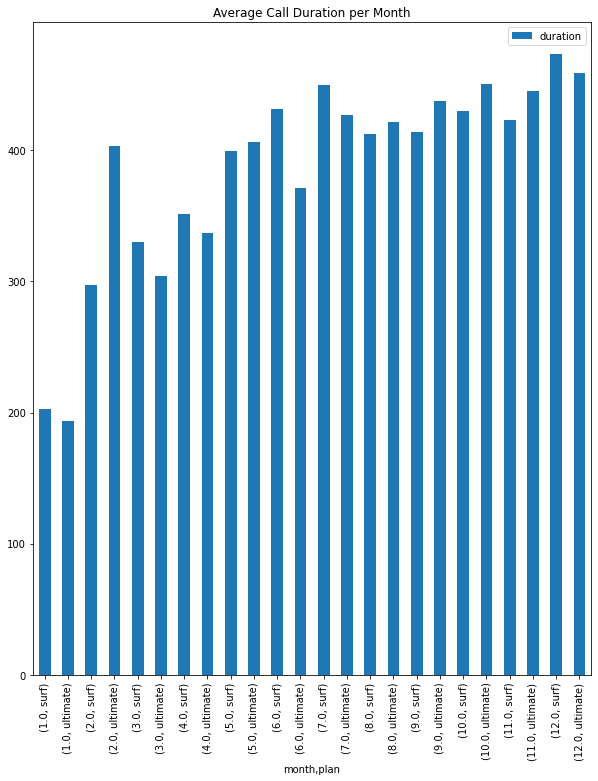

In [ ]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

call_length_avg = plan_data_final.pivot_table(index = ['month', 'plan'], values = 'duration')
call_length_avg.plot(kind = 'bar', figsize = (10,12))
plt.title('Average Call Duration per Month')

Text(0.5, 1.0, 'Durations of Calls for each Plan')

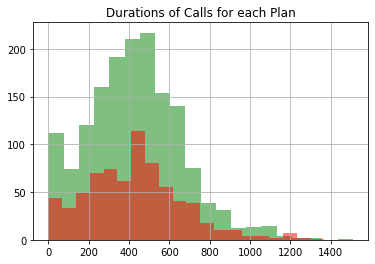

In [ ]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

surf_minutes_used = plan_data_final.query('plan == "surf"')
ultimate_minutes_used = plan_data_final.query('plan == "ultimate"')

surf_minutes_used['duration'].hist(bins = 20, alpha = .5, color = 'green')
ultimate_minutes_used['duration'].hist(bins = 20, alpha = .5, color = 'red')
plt.title('Durations of Calls for each Plan')

In [ ]:
# Calculate the mean and the variance of the monthly call duration

print(call_length_avg)
print()
variance = np.var(call_length_avg)
print(variance)

                  duration
month plan                
1.0   surf      203.000000
      ultimate  193.500000
2.0   surf      297.000000
      ultimate  403.142857
3.0   surf      330.000000
      ultimate  304.250000
4.0   surf      351.540000
      ultimate  336.857143
5.0   surf      399.584416
      ultimate  406.241379
6.0   surf      431.298969
      ultimate  370.957447
7.0   surf      449.983471
      ultimate  427.067797
8.0   surf      412.577640
      ultimate  421.436620
9.0   surf      414.226804
      ultimate  437.511628
10.0  surf      429.729958
      ultimate  450.735849
11.0  surf      423.325088
      ultimate  445.196850
12.0  surf      473.836478
      ultimate  459.099338

duration    5429.312322
dtype: float64


<AxesSubplot:>

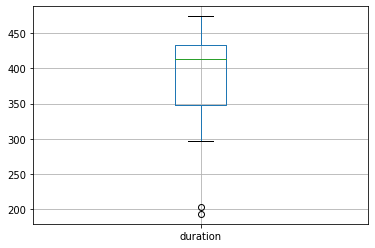

In [ ]:
# Plot a boxplot to visualize the distribution of the monthly call duration

call_length_avg.boxplot()

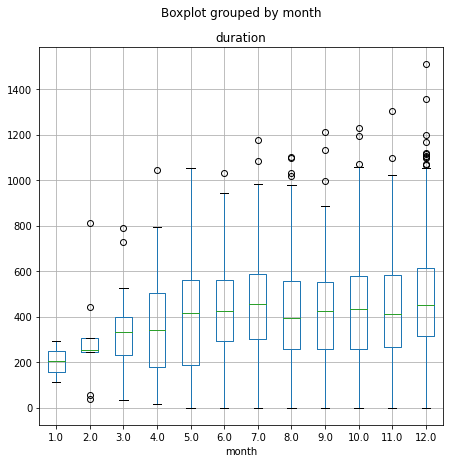

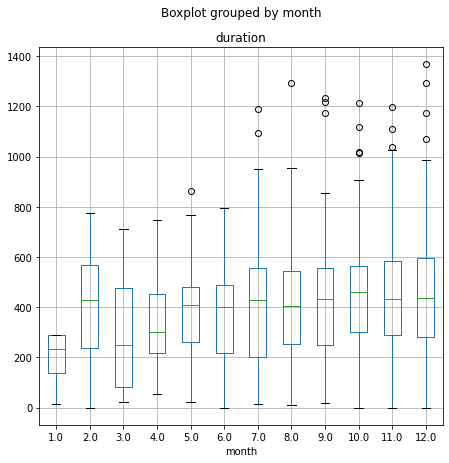

In [ ]:
#fig 1 is 'surf' fig 2 is 'ultimate'
for calllength, calldata in plan_data_final.groupby('plan'):
    calldata.boxplot(column = 'duration', by = 'month', figsize = (7,7))

**Conclusions**

Analyzing the average call data for the two plans provides some interesting information:

- There is very little difference in call duration between the the users of the two plans, and in fact users of the 'surf' plan have calls that are on average slightly longer than those on the 'ultimate' plan (with the exception of an outlier in February)
- The duration of calls for users on both plans rises consistently throughout the year to level out between July and December.
- This trend is represented again when looking at the total number of minutes used by users of both plans. But, unexpectedly, users of the 'surf' plan use roughly double the number of minutes on average per month than users of the 'ultimate' plan. 
- The average length of a call for both plans is just under 400 seconds. 

### Messages

Text(0.5, 1.0, 'Average Texts per Month by Plan')

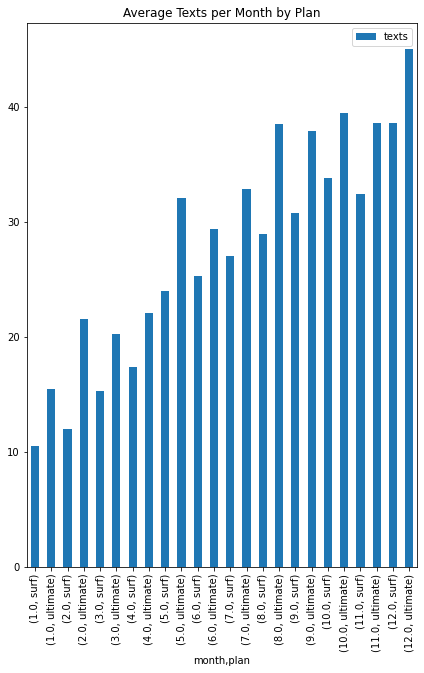

In [ ]:
# Compare the number of messages users of each plan tend to send each month

text_total_avg = plan_data_final.pivot_table(index = ['month', 'plan'], values = 'texts')
text_total_avg.plot(kind = 'bar', figsize = (7,10))
plt.title('Average Texts per Month by Plan')

Text(0.5, 1.0, 'Texts Used for each Plan')

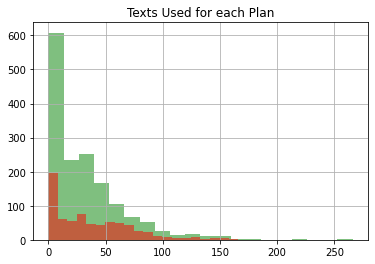

In [ ]:
surf_texts = plan_data_final.query('plan == "surf"')
ultimate_texts = plan_data_final.query('plan == "ultimate"')

surf_minutes_used['texts'].hist(bins = 20, alpha = .5, color = 'green')
ultimate_minutes_used['texts'].hist(bins = 20, alpha = .5, color = 'red')
plt.title('Texts Used for each Plan')

In [ ]:
# Calculate the mean and the variance of the total texts sent per plan

print(text_total_avg)
print()
variance = np.var(text_total_avg)
print(variance)

                    texts
month plan               
1.0   surf      10.500000
      ultimate  15.500000
2.0   surf      12.000000
      ultimate  21.571429
3.0   surf      15.260870
      ultimate  20.250000
4.0   surf      17.400000
      ultimate  22.047619
5.0   surf      24.012987
      ultimate  32.103448
6.0   surf      25.298969
      ultimate  29.340426
7.0   surf      27.033058
      ultimate  32.830508
8.0   surf      28.956522
      ultimate  38.478873
9.0   surf      30.762887
      ultimate  37.895349
10.0  surf      33.839662
      ultimate  39.443396
11.0  surf      32.385159
      ultimate  38.606299
12.0  surf      38.600629
      ultimate  45.006623

texts    87.93185
dtype: float64


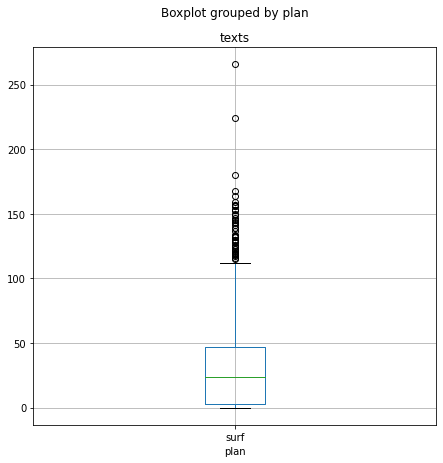

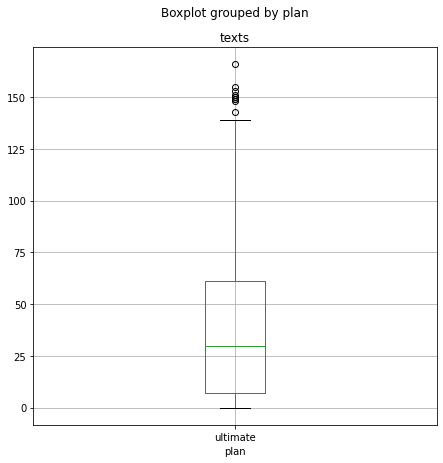

In [ ]:
for textuse, textdata in plan_data_final.groupby('plan_types'):
    textdata.boxplot(column = 'texts', by = 'plan', figsize = (7,7))

**Conclusions**

When we examine texts divided by plans we see pretty much what we expected:

- Users of the 'ultimate' plan send more texts per month than users of 'surf'
- Like with calls, users escalate through the year, sending more than double the number of texts in December than in January
- Users of the 'surf' plan are fairly likely to surpass their text limits, while the average use is lower than those on the ultimate plan, the outliers on surf actually text more than those on ultimate. 

### Internet

Text(0.5, 1.0, 'Average Internet Usage per Month by Plan')

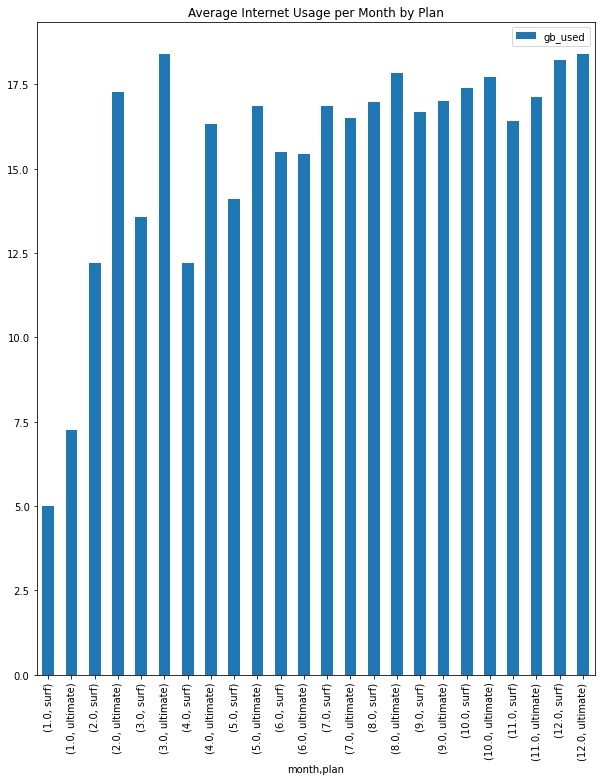

In [ ]:
# Compare the amount of internet traffic consumed by users per plan

internet_usage_avg = plan_data_final.pivot_table(index = ['month', 'plan'], values = 'gb_used')
internet_usage_avg.plot(kind = 'bar', figsize = (10,12))
plt.title('Average Internet Usage per Month by Plan')

Text(0.5, 1.0, 'Data Used for each Plan')

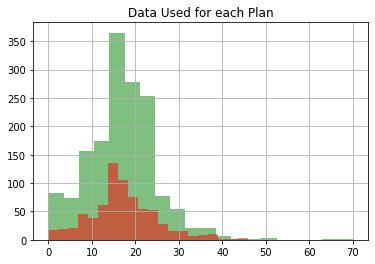

In [ ]:
surf_data_used = plan_data_final.query('plan == "surf"')
ultimate_data_used = plan_data_final.query('plan == "ultimate"')

surf_minutes_used['gb_used'].hist(bins = 20, alpha = .5, color = 'green')
ultimate_minutes_used['gb_used'].hist(bins = 20, alpha = .5, color = 'red')
plt.title('Data Used for each Plan')

In [ ]:
print(internet_usage_avg)
print()
variance = np.var(internet_usage_avg)
print(variance)

                  gb_used
month plan               
1.0   surf       5.000000
      ultimate   7.250000
2.0   surf      12.222222
      ultimate  17.285714
3.0   surf      13.565217
      ultimate  18.416667
4.0   surf      12.220000
      ultimate  16.333333
5.0   surf      14.116883
      ultimate  16.862069
6.0   surf      15.484536
      ultimate  15.425532
7.0   surf      16.876033
      ultimate  16.491525
8.0   surf      16.987578
      ultimate  17.845070
9.0   surf      16.690722
      ultimate  17.011628
10.0  surf      17.409283
      ultimate  17.716981
11.0  surf      16.431095
      ultimate  17.118110
12.0  surf      18.238994
      ultimate  18.397351

gb_used    10.914213
dtype: float64


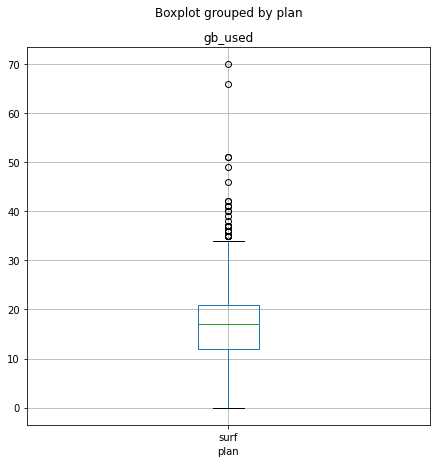

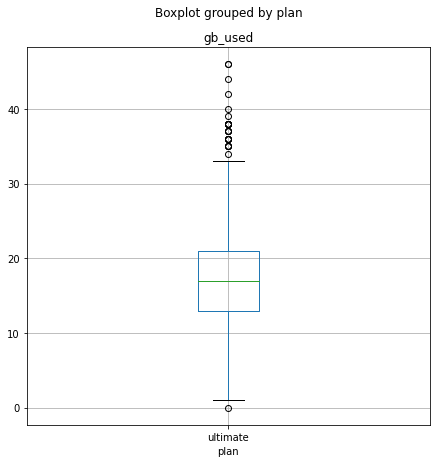

In [ ]:
for internetuse, internetdata in plan_data_final.groupby('plan_types'):
    internetdata.boxplot(column = 'gb_used', by = 'plan', figsize = (7,7))

**Conclusions**

The data from each plan's internet usage follows the same track as that of the text data:

- Users on the 'ultimate' plan use a signifcant amount more data than those on 'surf'
- All users increase their usage over the course of the year, though users on 'ultimate' have spikes in February and March.
- The average expenditure of data is around 13k mb/month. 
- There are users on surf have higher outlier usages than those on ultimate

## Revenue

Text(0.5, 1.0, 'Average Profit per Month by Plan')

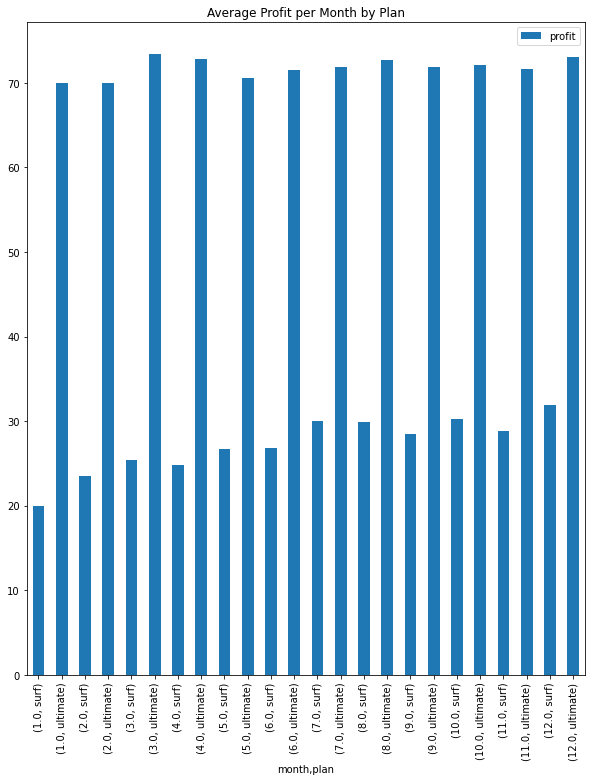

In [ ]:
profit_avg = plan_data_final.pivot_table(index = ['month', 'plan'], values = 'profit')
profit_avg.plot(kind = 'bar', figsize = (10,12))
plt.title('Average Profit per Month by Plan')

Text(0.5, 1.0, 'Total Revenue for each Plan')

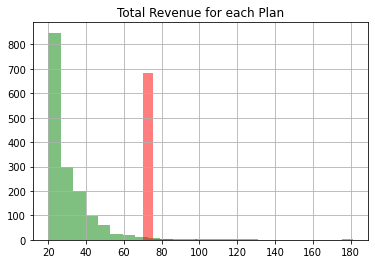

In [ ]:
surf_revenue = plan_data_final.query('plan == "surf"')
ultimate_revenue = plan_data_final.query('plan == "ultimate"')

surf_minutes_used['profit'].hist(bins = 20, alpha = .5, color = 'green')
ultimate_minutes_used['profit'].hist(bins = 20, alpha = .5, color = 'red')
plt.title('Total Revenue for each Plan')

In [ ]:
print(profit_avg)
print()
variance = np.var(profit_avg)
print(variance)

                   profit
month plan               
1.0   surf      20.000000
      ultimate  70.000000
2.0   surf      23.537431
      ultimate  70.000000
3.0   surf      25.435525
      ultimate  73.473867
4.0   surf      24.781186
      ultimate  72.837890
5.0   surf      26.690107
      ultimate  70.528097
6.0   surf      26.771329
      ultimate  71.512427
7.0   surf      29.978396
      ultimate  71.894824
8.0   surf      29.916936
      ultimate  72.744425
9.0   surf      28.508334
      ultimate  71.855805
10.0  surf      30.232636
      ultimate  72.141890
11.0  surf      28.791065
      ultimate  71.639633
12.0  surf      31.856134
      ultimate  73.118812

profit    503.202209
dtype: float64


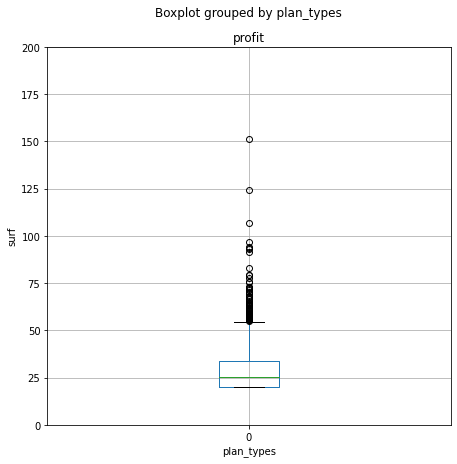

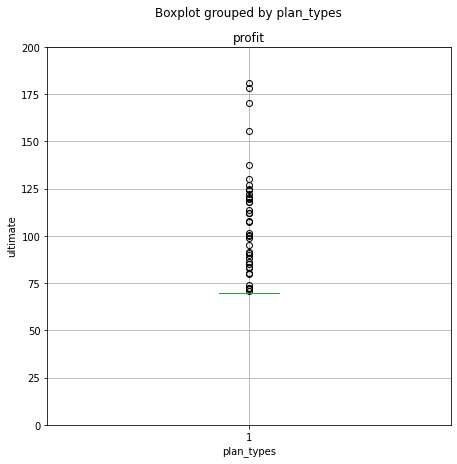

In [ ]:
for plantype, plandata in plan_data_final.groupby('plan'):
    plandata.boxplot(column = 'profit', by = 'plan_types', figsize = (7,7))
    plt.ylabel(plantype)
    plt.ylim([0,200])

**Conclusions**

Given the large price differences between the surf and ultimate plans it is unsurprising that the ultimate plan appears more profitable. 

It appears however that there are more surf usersthat use calls/texts/data beyond their plan limits than users of the ultimate plan, though when looking at total expenditure, outlier users on the ultimate plan do end up spending more ($178 for ultimate vs $150 for surf)

## Test statistical hypotheses

Now that we've conducted analysis on each aspect of the plans it's time to do some overaching analysis on which plan is more profitable over all. My first hypothesis to test is:

**Despite 'surf' users paying more than their base plan the 'ultimate' plan draws more revenue over all.**

I will be exploring this hypothesis by looking at monthly revenue averages for both plans and applying statistical analysis. 

In [ ]:
monthly_profit = plan_data_final.pivot_table(index = ['plan', 'month'], values = 'profit', aggfunc = 'mean')
print(monthly_profit)

                   profit
plan     month           
surf     1.0    20.000000
         2.0    23.537431
         3.0    25.435525
         4.0    24.781186
         5.0    26.690107
         6.0    26.771329
         7.0    29.978396
         8.0    29.916936
         9.0    28.508334
         10.0   30.232636
         11.0   28.791065
         12.0   31.856134
ultimate 1.0    70.000000
         2.0    70.000000
         3.0    73.473867
         4.0    72.837890
         5.0    70.528097
         6.0    71.512427
         7.0    71.894824
         8.0    72.744425
         9.0    71.855805
         10.0   72.141890
         11.0   71.639633
         12.0   73.118812


In [ ]:
surf = monthly_profit.query('plan == "surf"')
ultimate = monthly_profit.query('plan == "ultimate"')

In [ ]:
# Test the hypotheses

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(surf, ultimate, equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  [5.89601673e-16]
We reject the null hypothesis


We must reject the null hypothesis! An unexpexted outcome but such is the nature of statistical analysis. We must forge forward. The rejecting of the null hypothesis tells us that we cannot assume that profit for 'ultimate' plans is higher than that of 'surf' plans. 

Our next hypothesis to test is: 

**Users in the NY-NJ area spend significantly more on their plans than users in other regions** 


If true, this will have significant impacts on the way users in that area may be treated. 

If the hypothesis is rejected however that will show us that there is no particular difference in the usage trends between users in the NY-NJ area and the rest of the country meaning any actions by the supplier will be just as applicable in this region as any other. 

In [ ]:
# Test the hypotheses

region_test = plan_data_final.pivot_table(index = ['region', 'month'], values = 'profit', aggfunc = 'mean')

NY_NJ_area = region_test.query('region == "NY-NJ area"')
Other = region_test.query('region == "Other"')

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(NY_NJ_area, Other, equal_var = True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  [3.74077433e-06]
We reject the null hypothesis


And we have rejected the hypothesis! This tells us that there are no major differences in revenue between the users in the NY-NJ area and the rest of the country. This is very helpful information as it allows the marketing team or product development teams valuable information for deciding how to rollout new products or what services may be most popular in different regions. 

## General conclusion

**Conclusions**

- Users of both surf and ultimate increased usage off all part of their plans over the course of the year, with the highest amout of texts sent, mbs used, and the longest call durations in december.
- Generally users of both plans did not surpass the limits of their respective plans, though users on surf plans were far more likely to spend more than plans original cost due to over use of resources. 
- Users on surf spent more by the end of the year than at the beginning of the year while the expenditure of users on ultimate remained the same year-round 
- Users in the NY-NJ area did not generate any more revenue than users in other regions
- Users on surf plans had signifcatly longer call durations than users on ultimate plans
- Users on ultimate plans sent significantly more texts and used signifcantly more mbs than users on surf

**The Journey**

To reach these conclusions I had to take a number of steps:

- Each of the individual dataframes had to be preprocessed to remove or fix data irregularities and to add any necessary data for the later analysis
- The seperate dataframes had to be merged in to one complete dataframe so analysis could be conducted 
- I had to examine each aspect of the plans seperately (calls, texts, data) to see how user behavior differed between the two plans 
- I had to use SDA to examine how revenues differed between the two plans and between users in the NY-NJ area and the rest of the country.